In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


In [ ]:



x=np.array([1,2,3,4,5])
y=np.array([1,2,3,4,5])
a2,a1,a0 = np.polyfit(x,y,2)

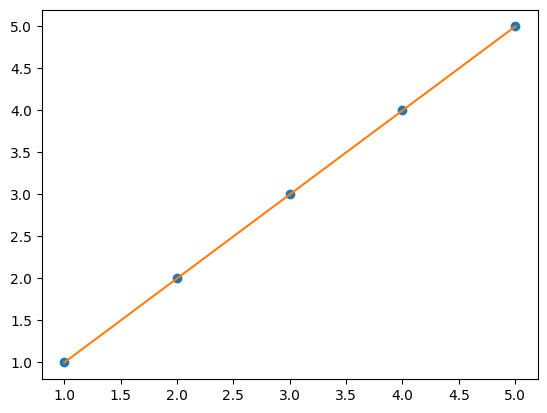

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,a2*x**2+a1*x+a0)
plt.show()

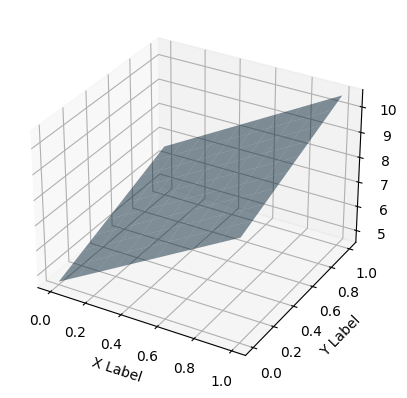

In [ ]:
x1 =np.array([0,2,3,1,4,7])
x2 =np.array([0,1,2,3,6,2])
y = np.array([5,10,9,0,3,27])

x1_ = np.outer(np.linspace(0, 1, 10), np.ones(10))
x2_ = x1_.copy().T
y_ = 4.63 + 3.98*x1_ + 1.94*x2_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x1, x2, y, c='r', marker='o')
# ax.scatter(x1, x2, y, c='r', marker='o')
ax.plot_surface(x1_, x2_, y_, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
n = len(x1)
x1_sum = np.sum(x1)
x2_sum = np.sum(x2)
x1_x2_sum = np.sum(x1*x2)
x1_x1_sum = np.sum(x1*x1)
x2_x2_sum = np.sum(x2*x2)
y_sum = np.sum(y)
x1_y_sum = np.sum(x1*y)
x2_y_sum = np.sum(x2*y)

A = np.array([[n,x1_sum,x2_sum],[x1_sum,x1_x1_sum,x1_x2_sum],[x2_sum,x1_x2_sum,x2_x2_sum]])
B = np.array([y_sum,x1_y_sum,x2_y_sum])
X = np.linalg.solve(A,B)
print(X)

[ 4.63609813  3.97663551 -2.95852804]


In [ ]:
from sklearn.linear_model import LinearRegression
data_x=np.array([x1,x2]).T
data_y=y
model = LinearRegression()
model.fit(data_x,data_y)
print(model.coef_)
print(model.intercept_)

[ 3.97663551 -2.95852804]
4.636098130841119


In [ ]:
x1_ = np.outer(np.linspace(0, 1, 10), np.ones(10))
x2_ = np.outer(np.ones(10), np.linspace(0, 1, 10))
y_ = model.predict(np.array([x1_.flatten(),x2_.flatten()]).T).reshape(10,10)

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-39-b76edda9ac57>, line 1)

In [ ]:
z = np.zeros((len(x1),3))
for i in range(len(x1)):
    z[i,0] = 1
    z[i,1] = x1[i]
    z[i,2] = x2[i]
print(z)

In [ ]:
Y = y.reshape(-1,1)
print(Y)

In [ ]:
A = np.linalg.inv(z.T@z)@z.T@Y
print(A)
# ได้ผลลัพธ์เหมือนอันแรกอีกแล้ว

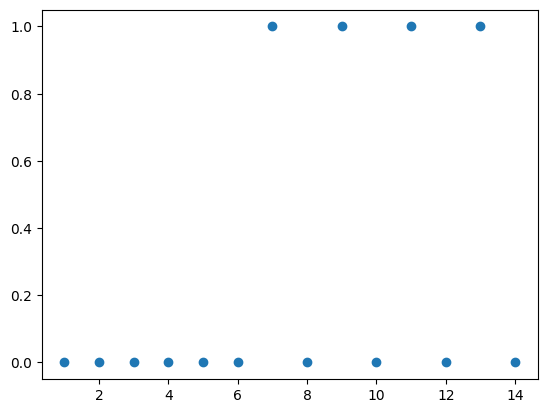

In [ ]:
# Logidtic Regresstion
x =np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y =np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,])
plt.scatter(x,y)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x.reshape(-1,1),y)
print(model.coef_)
print(model.intercept_)

[[0.23959478]]
[-2.90323868]


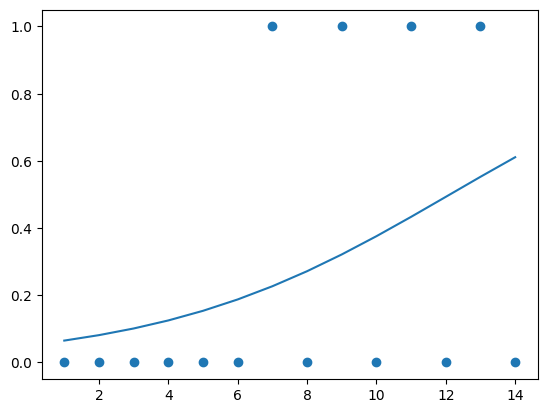

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1, 1000)

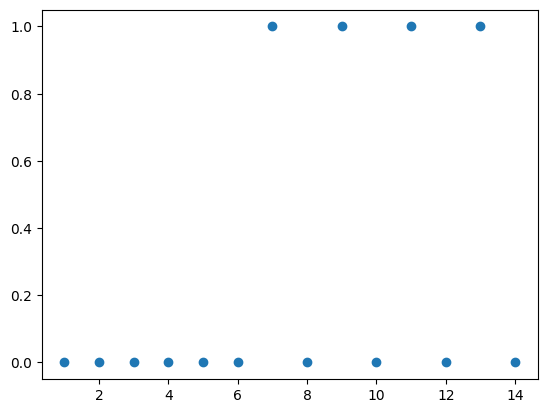

In [ ]:
plt.scatter(x,y)
plt.plot(x,model.predict_proba(x.reshape(-1,1))[:,1])
plt.show()
x_ = np.linspace(0,15,1000)
y_ = 1/(1+np.exp(-(model.coef_*x_+model.intercept_)))
plt.scatter(x,y)
plt.plot(x_,y_)
plt.show()

In [ ]:
model.predict_proba(np.array([2]).reshape(-1,1))

array([[0.91864288, 0.08135712]])

In [ ]:
# create function for correlation

def correlation_coefficient(x, y):
    Mxy = np.mean(x*y)
    Mx = np.mean(x)
    My = np.mean(y)
    Mx2 = np.mean(x**2)
    My2 = np.mean(y**2)
    return (Mxy - Mx*My)/np.sqrt((Mx2-Mx**2)*(My2-My**2))


In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
df = load_diabetes(as_frame= True)
df = df.frame
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
corr = np.zeros((11,11))
for i in range(11):
    for j in range(11):
        corr[i,j] = correlation_coefficient(df.iloc[:,i],df.iloc[:,j])
print(corr)
#

[[ 1.          0.1737371   0.18508467  0.33542759  0.26006082  0.21924314
  -0.07518097  0.2038409   0.27077424  0.30173101  0.18788875]
 [ 0.1737371   1.          0.0881614   0.24101049  0.03527682  0.14263726
  -0.37908963  0.33211509  0.14991614  0.20813322  0.043062  ]
 [ 0.18508467  0.0881614   1.          0.3954109   0.24977742  0.26116991
  -0.36681098  0.4138066   0.44615654  0.38867999  0.58645013]
 [ 0.33542759  0.24101049  0.3954109   1.          0.24246402  0.18554846
  -0.17876163  0.25765005  0.39348011  0.39043002  0.44148176]
 [ 0.26006082  0.03527682  0.24977742  0.24246402  1.          0.89666296
   0.05151936  0.54220728  0.51550292  0.32571675  0.21202248]
 [ 0.21924314  0.14263726  0.26116991  0.18554846  0.89666296  1.
  -0.19645512  0.65981689  0.31835667  0.29060038  0.17405359]
 [-0.07518097 -0.37908963 -0.36681098 -0.17876163  0.05151936 -0.19645512
   1.         -0.73849273 -0.39857729 -0.2736973  -0.39478925]
 [ 0.2038409   0.33211509  0.4138066   0.25765005

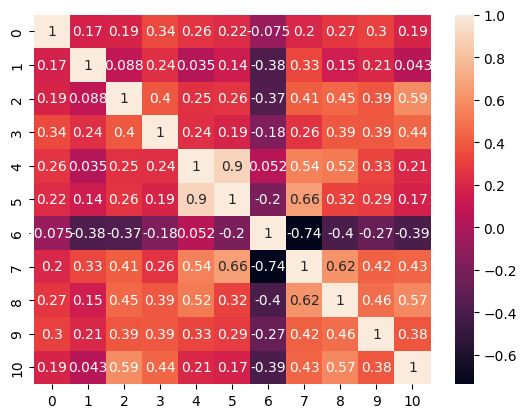

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True)
plt.show()
#

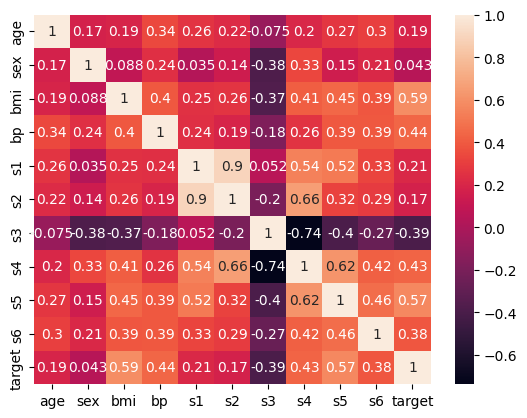

In [ ]:
# use with pandas function
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()
#